In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import wbdata
import re
import numpy as np
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
from dateutil.relativedelta import relativedelta
import pycountry_convert as pc
import pycountry

rc_params = {
    'axes.labelsize': 16,  # Larger font size for the x and y labels
    'axes.labelweight': 'bold',  # Bold font weight for the labels
    'axes.labelpad': 10,  # Padding between the labels and the axes
    'axes.titlesize': 20,  # Larger font size for the title
    'axes.titlepad': 20,
    'axes.titleweight': 'bold',  # Bold font weight for the title
    'xtick.labelsize': 14,  # Font size for the x-tick labels
    'ytick.labelsize': 14,  # Font size for the y-tick labels
    'lines.linewidth': 2,
    # Add other parameters as needed
}
plt.rcParams.update(rc_params)

# plt.style.use('tableau-colorblind10')

# Load Population Data

In [201]:
indicators = {
    "SP.POP.TOTL": "total_population",
    "NY.GDP.PCAP.CD": "gdp_per_capita",
}

countries = {'ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MSR', 'MTQ', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NER', 'NFK', 'NGA', 'NIC', 'NIU', 'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PCN', 'PER', 'PHL', 'PLW', 'PNG', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SHN', 'SLB', 'SLE', 'SLV', 'SMR', 'SOM', 'SPM', 'SRB', 'SSD', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC', 'SYR', 'TCA', 'TCD', 'TGO', 'THA', 'TJK', 'TKL', 'TKM', 'TLS', 'TON', 'TTO', 'TUN', 'TUV', 'TWN', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VAT', 'VCT', 'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'WLD', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'}
countries_to_exclude = {"AIA", "COK", "FLK", "GLP", "VAT", "MTQ", "MYT", "MSR", "NIU", "NFK", "PCN", "SHN", "SPM", "TWN", "TKL", "WLF", "ESH"}
wb_countries = countries - countries_to_exclude

population_data_df = wbdata.get_dataframe(indicators, country=wb_countries, parse_dates=True, date=('1961', '2022'))

In [202]:
population_data_df = population_data_df.reset_index()

In [203]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None


In [204]:
population_data_df['continent'] = population_data_df['country'].apply(lambda x: country_to_continent(x))

In [205]:
population_data_df.loc[population_data_df['country'] == 'Bahamas, The', 'continent'] = 'North America'
population_data_df.loc[population_data_df['country'] == 'Congo, Dem. Rep.', 'continent'] = 'Africa'
population_data_df.loc[population_data_df['country'] == 'Congo, Rep.', 'continent'] = 'Africa'
population_data_df.loc[population_data_df['country'] == "Egypt, Arab Rep.", 'continent'] = "Africa"
population_data_df.loc[population_data_df['country'] == "Micronesia, Fed. Sts.", 'continent'] = "Oceania"
population_data_df.loc[population_data_df['country'] == "Gambia, The", 'continent'] = "Africa"
population_data_df.loc[population_data_df['country'] == "Hong Kong SAR, China", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Iran, Islamic Rep.", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Korea, Rep.", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Lao PDR", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Macao SAR, China", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Korea, Dem. People's Rep.", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "West Bank and Gaza", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "Timor-Leste", 'continent'] = "Asia"
population_data_df.loc[population_data_df['country'] == "St. Vincent and the Grenadines", 'continent'] = "North America"
population_data_df.loc[population_data_df['country'] == "Venezuela, RB", 'continent'] = "South America"
population_data_df.loc[population_data_df['country'] == "Virgin Islands (U.S.)", 'continent'] = "North America"
population_data_df.loc[population_data_df['country'] == "World", 'continent'] = "World"
population_data_df.loc[population_data_df['country'] == "Yemen, Rep.", 'continent'] = "Asia"

In [206]:
population_data_df.loc[population_data_df['continent'] == "North America", 'continent'] = 'Northern America'
population_data_df.loc[population_data_df['continent'] == "Asia", 'continent'] = 'Asia'
population_data_df.loc[population_data_df['continent'] == "Africa", 'continent'] = 'Africa'
population_data_df.loc[population_data_df['continent'] == "Europe", 'continent'] = 'Europe'
population_data_df.loc[population_data_df['continent'] == "South America", 'continent'] = 'Latin America and the Caribbean'
population_data_df.loc[population_data_df['continent'] == "Oceania", 'continent'] = 'Australia and New Zealand'
population_data_df.loc[population_data_df['continent'] == "World", 'continent'] = 'World'

In [207]:
population_data_df = population_data_df.drop_duplicates()

# Annual Surface Temperature Change

In [208]:
annual_surface_temp_change = pd.read_csv('./IMF-CID/Annual_Surface_Temperature_Change.csv')

In [209]:
annual_surface_temp_change_filtered = annual_surface_temp_change[~annual_surface_temp_change['ISO3'].isin(countries_to_exclude)]
annual_surface_temp_change_filtered = annual_surface_temp_change_filtered[['Country'] + [e for e in annual_surface_temp_change_filtered.columns if re.match('F[0-9]{4}', e)]]

## By Continent

In [210]:
annual_surface_temp_change_filtered_wc = annual_surface_temp_change_filtered.merge(population_data_df[['country', 'continent']], left_on='Country', right_on='country')
annual_surface_temp_change_filtered_wc['Continent'] = annual_surface_temp_change_filtered_wc['continent']
annual_surface_temp_change_filtered_wc = annual_surface_temp_change_filtered_wc.drop(columns=['country', 'Country', 'continent'])

In [211]:
astcf_wc_grouped = annual_surface_temp_change_filtered_wc.groupby('Continent').mean().reset_index()

In [212]:
astcgc_melted = astcf_wc_grouped.melt(id_vars='Continent', var_name='Financial Year', value_name='Value')
astcgc_melted['Financial Year'] = pd.to_datetime(astcgc_melted['Financial Year'], format='F%Y')

In [213]:
astcgc_pivoted = astcgc_melted.pivot(index='Financial Year', columns='Continent', values='Value')

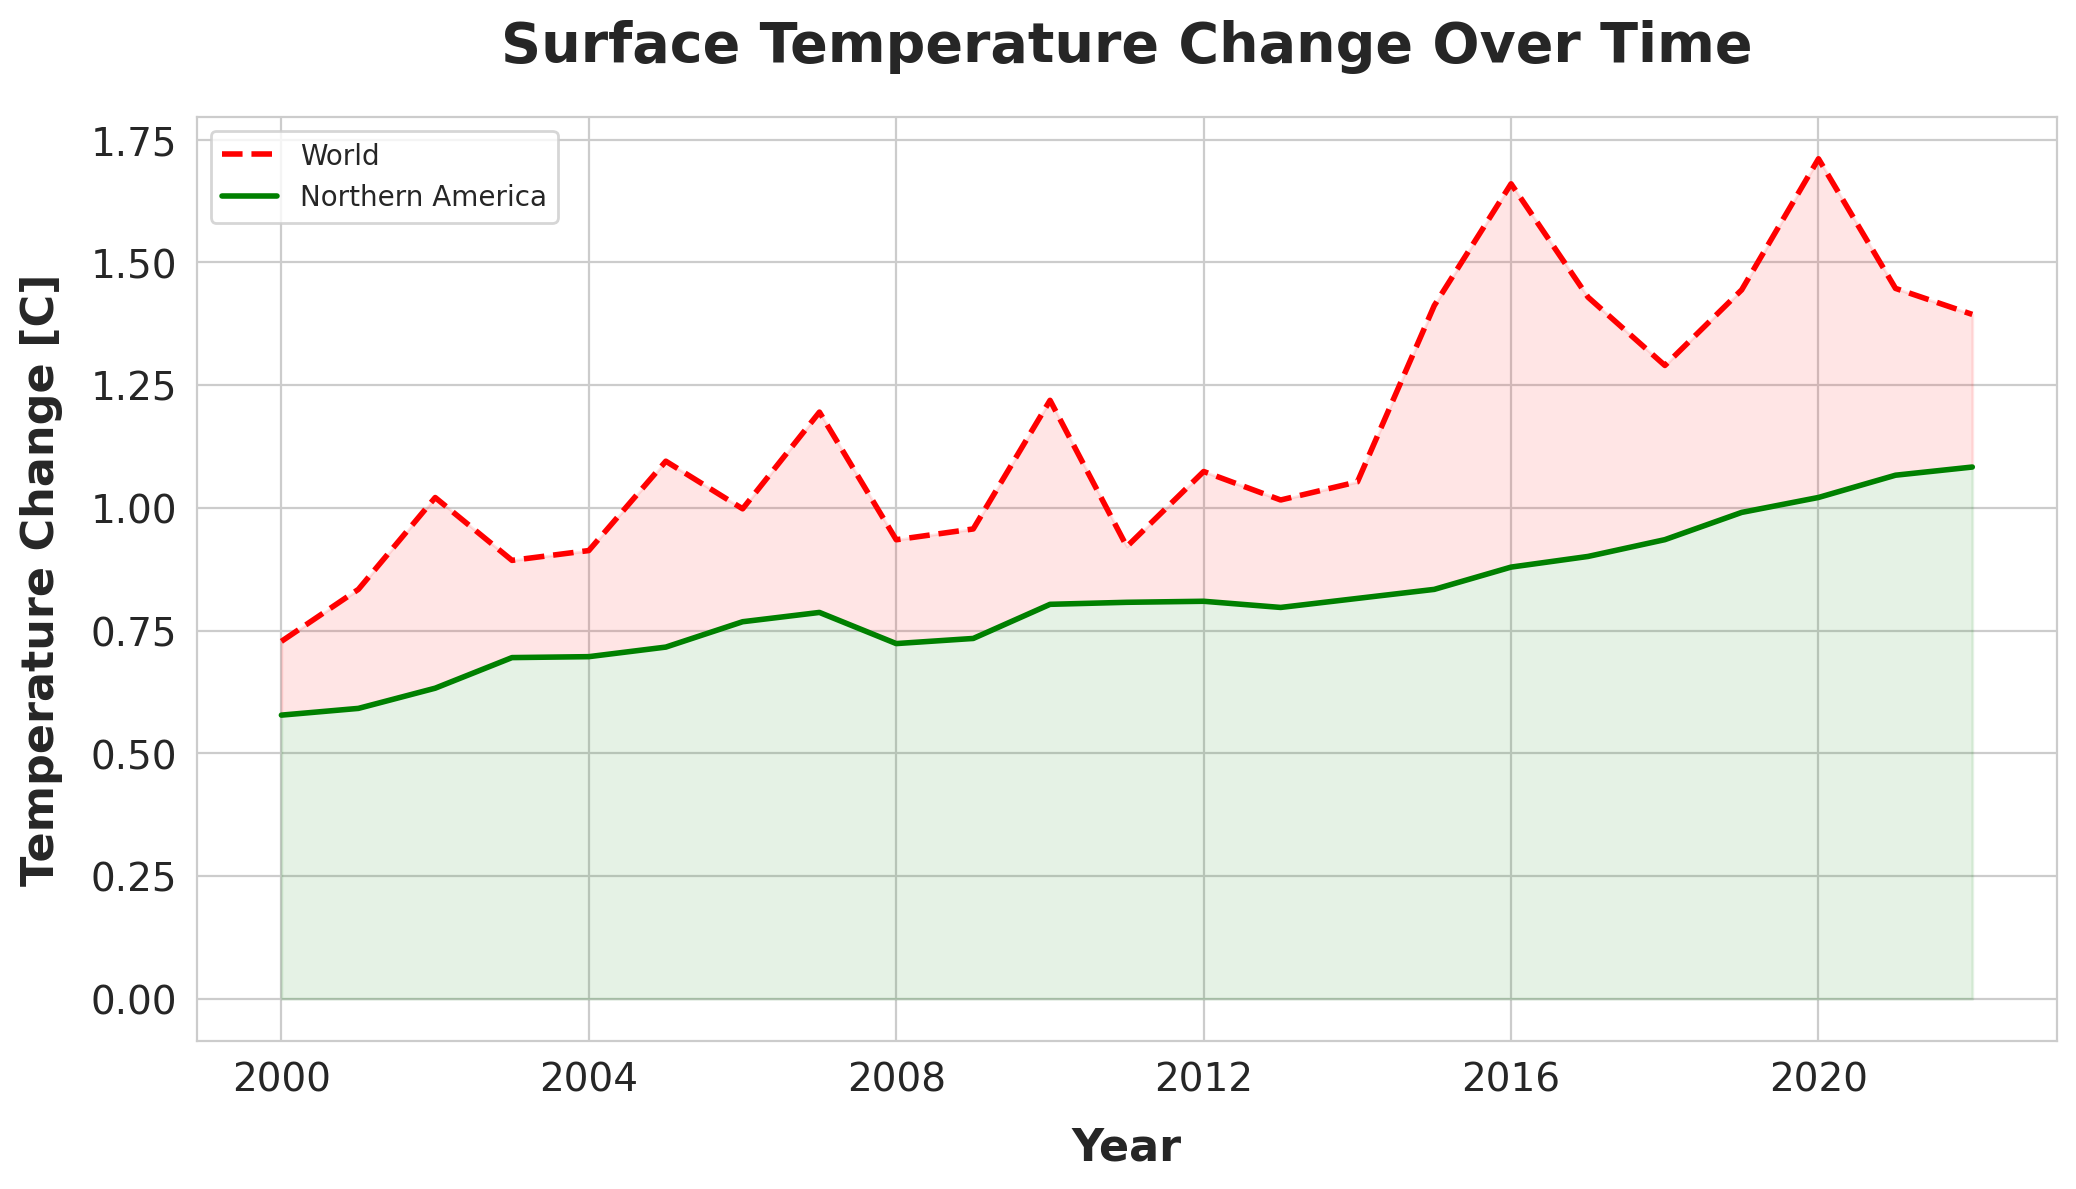

In [256]:
N = 10  # Window size

data = astcgc_pivoted.copy(deep=True)
data['Northern America'] = astcgc_pivoted['Northern America'].rolling(window=N).mean()

fig, ax = plt.subplots(1,1,figsize=(12, 6))

# Sort DataFrame columns based on the last row's values
sorted_columns = data[['World', 'Northern America']].iloc[-1].sort_values(ascending=False).index
sorted_df = data[sorted_columns]

cutoff = dt.datetime(year=2000, month=1, day=1)
f_sorted_df = sorted_df[sorted_df.index >= cutoff]

# Plot each line
ax.plot(f_sorted_df.index, f_sorted_df['World'], label='World', linestyle='--', color='red')
ax.plot(f_sorted_df.index, f_sorted_df['Northern America'], label='Northern America', linestyle='-', color='green')

ax.fill_between(x=f_sorted_df.index, y1=f_sorted_df['Northern America'], y2=f_sorted_df['World'], color='red', alpha=0.1)
ax.fill_between(x=f_sorted_df.index, y1=0, y2=f_sorted_df['Northern America'], color='green', alpha=0.1)
# Adjust legend
# The legend will automatically order based on the plotting order, which is now sorted
ax.legend(title='')
ax.set_title('Surface Temperature Change Over Time')
# ax.set_ylim(0,20000)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change [C]')
fig.savefig('./surface_temp_us_wins.svg')
plt.show()

In [258]:
population_data_df_pivot_tcc = population_data_df[['continent', 'date', 'total_population']].drop_duplicates().pivot_table(index='date',
                                                                                                                           columns='continent',
                                                                                                                           values='total_population', aggfunc='mean')

In [259]:
temperature_change_per_capita = pd.DataFrame(astcgc_pivoted.to_numpy() / population_data_df_pivot_tcc.to_numpy(),
                                             columns=astcgc_pivoted.columns, index=astcgc_pivoted.index)

In [260]:
temperature_change_per_capita['World'] = temperature_change_per_capita.drop(columns='World').min(axis=1)

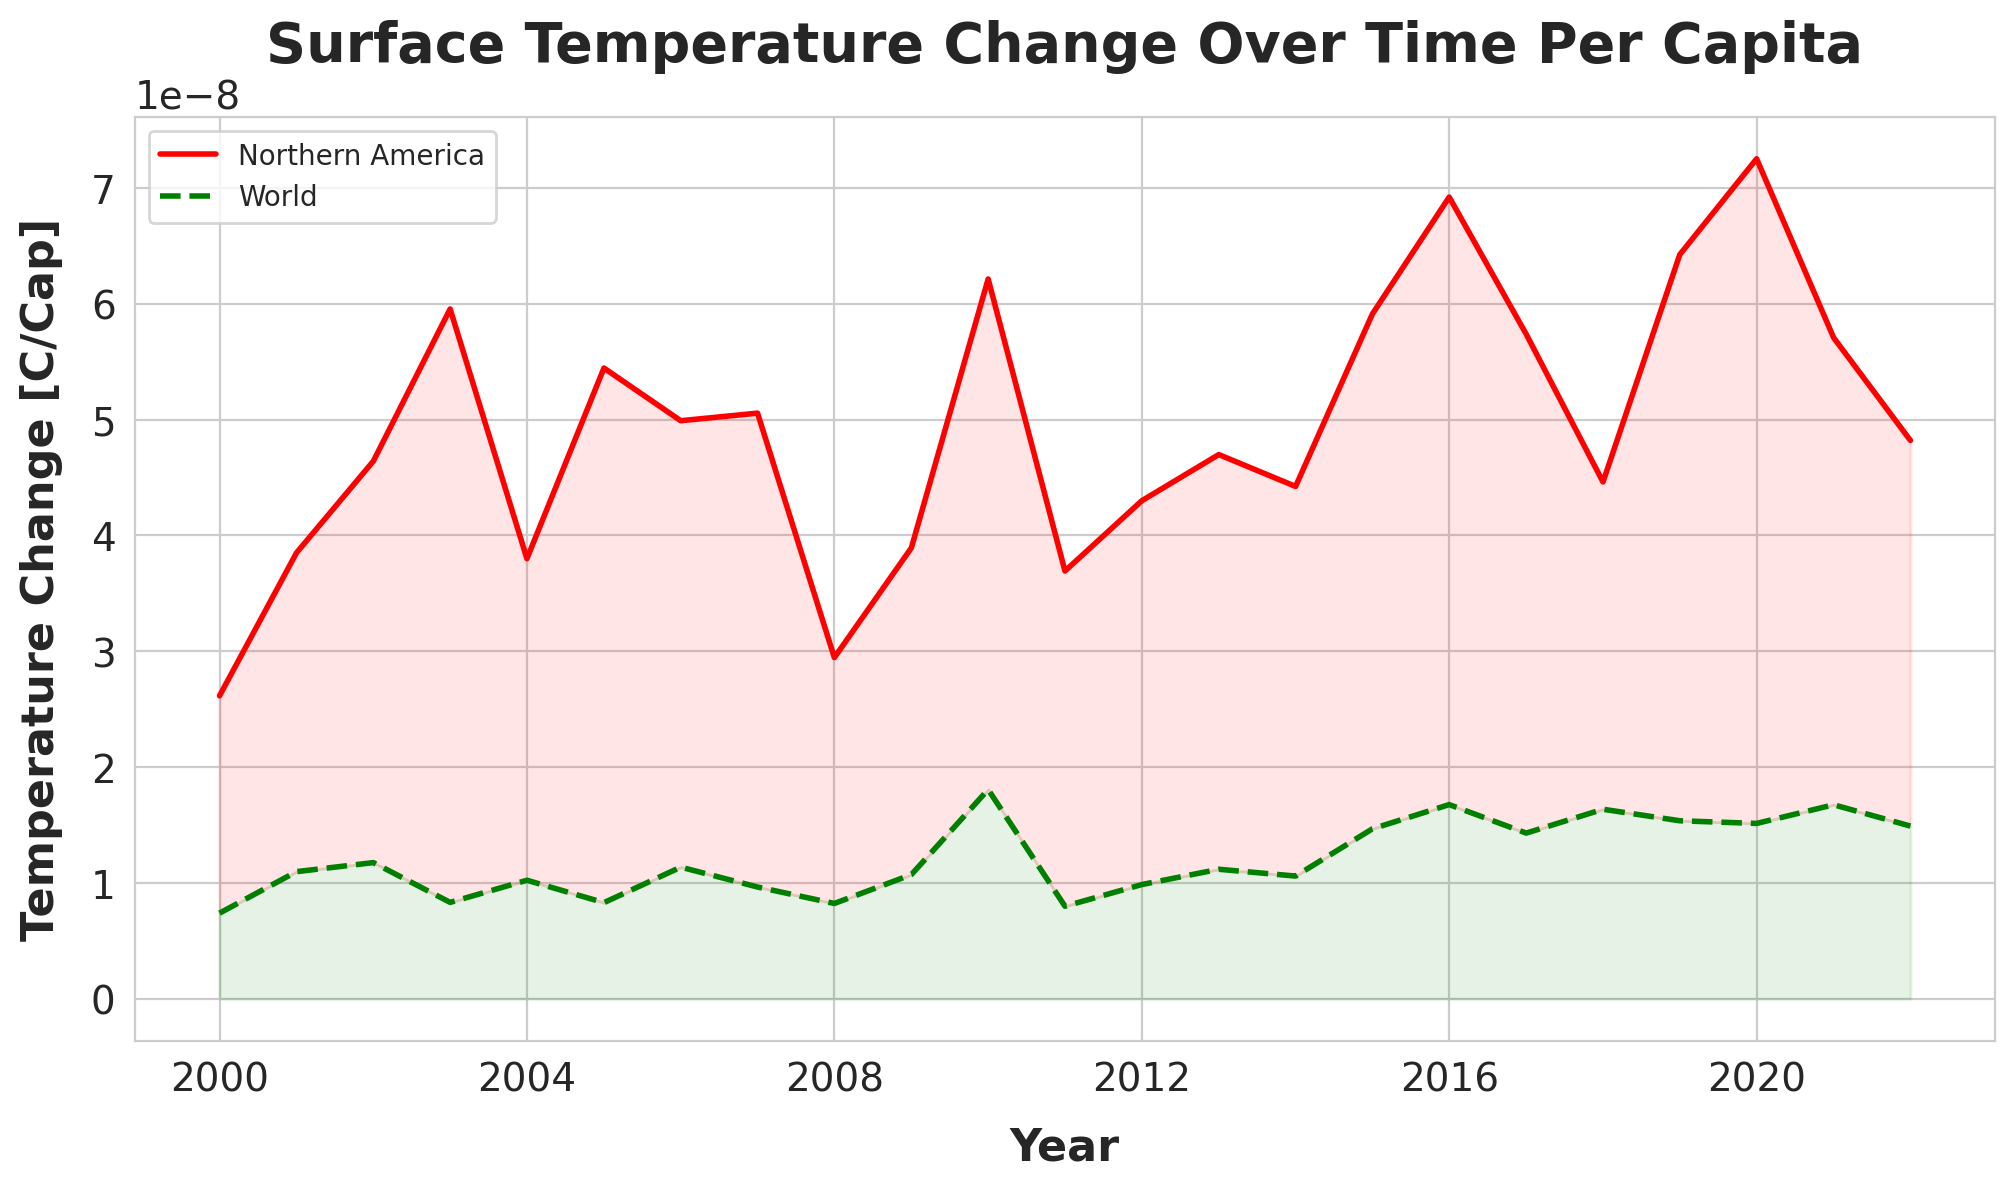

In [261]:
N = 10  # Window size

data = temperature_change_per_capita.copy(deep=True)
# data['Northern America'] = temperature_change_per_capita['Northern America'].rolling(window=N).mean()

fig, ax = plt.subplots(1,1,figsize=(12, 6))

# Sort DataFrame columns based on the last row's values
sorted_columns = data[['World', 'Northern America']].iloc[-1].sort_values(ascending=False).index
sorted_df = data[sorted_columns]

cutoff = dt.datetime(year=2000, month=1, day=1)
f_sorted_df = sorted_df[sorted_df.index >= cutoff]

# Plot each line
ax.plot(f_sorted_df.index, f_sorted_df['Northern America'], label='Northern America', linestyle='-', color='red')
ax.plot(f_sorted_df.index, f_sorted_df['World'], label='World', linestyle='--', color='green')

ax.fill_between(x=f_sorted_df.index, y1=0, y2=f_sorted_df['World'], color='green', alpha=0.1)
ax.fill_between(x=f_sorted_df.index, y1=f_sorted_df['World'], y2=f_sorted_df['Northern America'], color='red', alpha=0.1)
# Adjust legend
# The legend will automatically order based on the plotting order, which is now sorted
ax.legend(title='')
ax.set_title('Surface Temperature Change Over Time Per Capita')
# ax.set_ylim(0,20000)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change [C/Cap]')
fig.savefig('./surface_temp_us_loses.svg')
plt.show()

## By Country

In [219]:
astc_melted = annual_surface_temp_change_filtered.melt(id_vars='Country', var_name='Financial_Year', value_name='Value')
astc_melted['Financial_Year'] = pd.to_datetime(astc_melted['Financial_Year'], format='F%Y')

In [220]:
astc_pivoted = astc_melted.pivot(index='Financial_Year', columns='Country', values='Value')

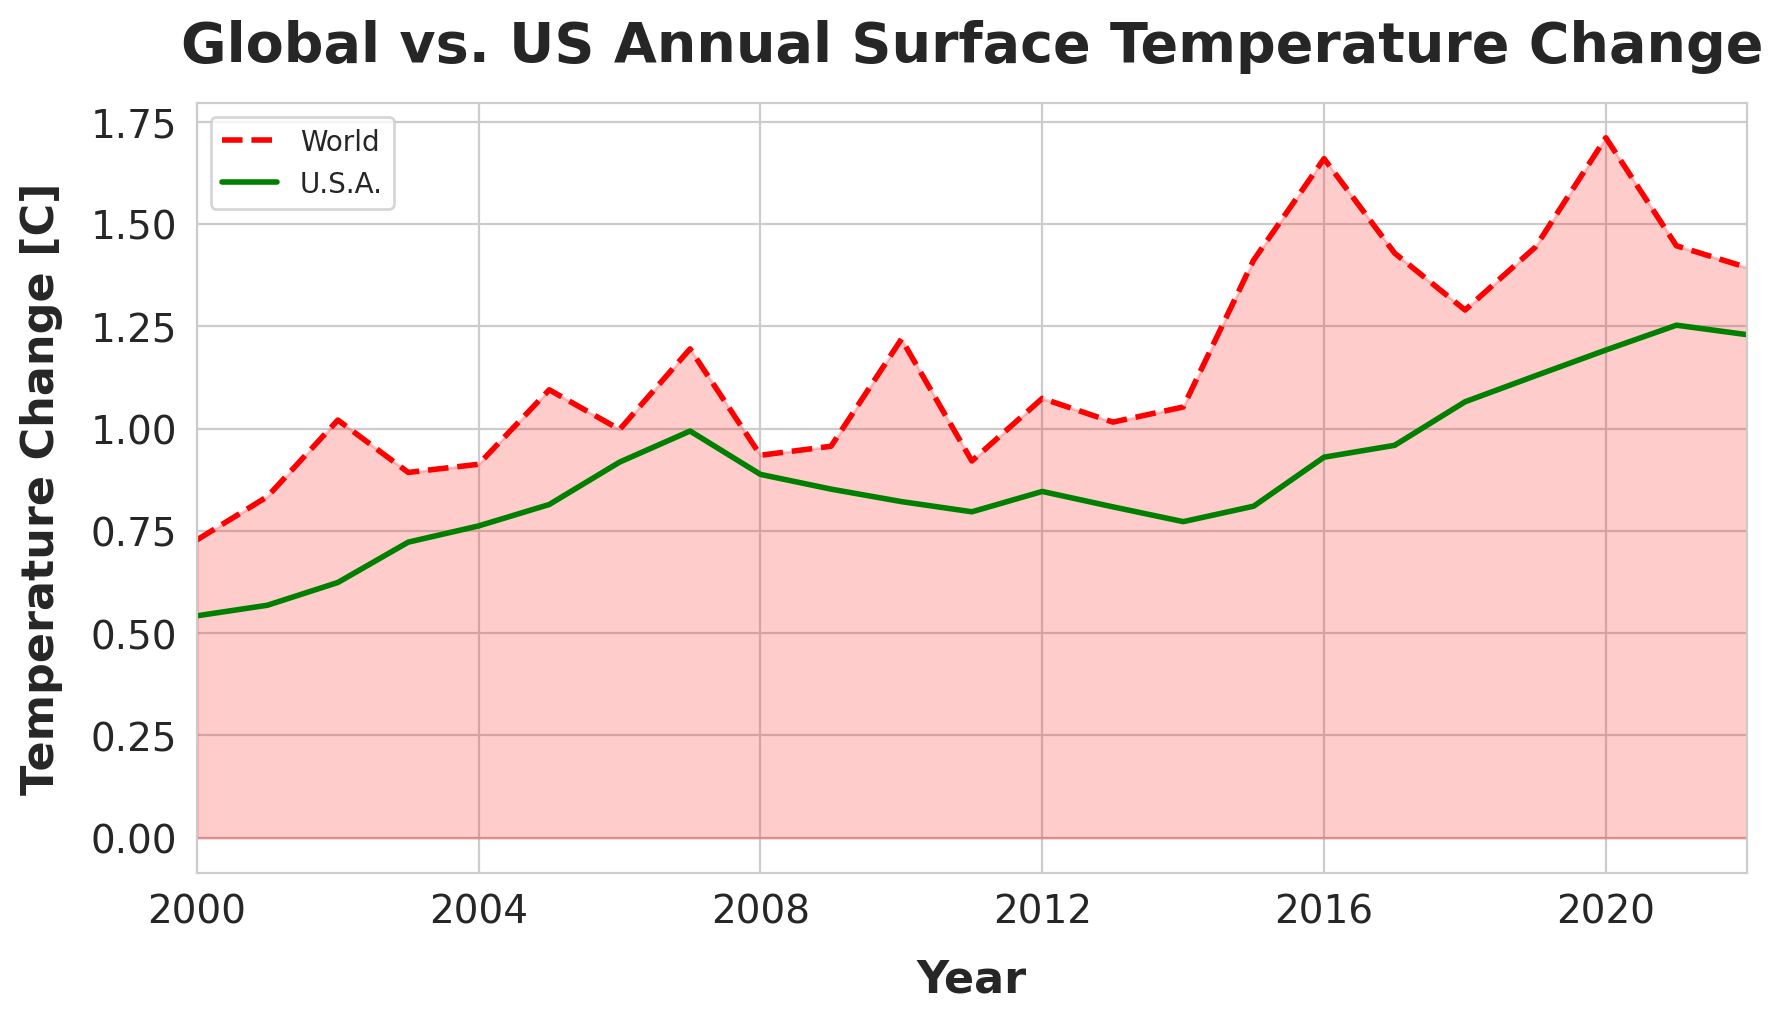

In [221]:
N = 10  # Window size
astc_pivoted['us_sm'] = astc_pivoted['United States'].rolling(window=N).mean()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# plt.plot(astc_pivoted.index, astc_pivoted['United States'], label='Original Data')

cutoff = pd.Timestamp('2000-01-01')
data = astc_pivoted[astc_pivoted.index >= cutoff]
x = data.index

ax.plot(x, data['World'], label='World', color='red', linestyle='--')
ax.fill_between(x, y1=0, y2=data['World'], color='red', alpha=0.2)
ax.plot(x, data['us_sm'], label='U.S.A.', color='green')
ax.legend()
ax.set_title('Global vs. US Annual Surface Temperature Change')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change [C]')
ax.set_xlim(cutoff, cutoff+relativedelta(years=22))

astc_pivoted = astc_pivoted.drop(columns=['us_sm'])

plt.show()

In [222]:
population_data_df_pivot_tc = population_data_df[['country', 'date', 'total_population']].pivot(index='date', columns='country', values='total_population')

In [223]:
temperature_change_per_capita = pd.DataFrame(astc_pivoted.to_numpy() / population_data_df_pivot_tc.to_numpy(), columns=astc_pivoted.columns, index=astc_pivoted.index)

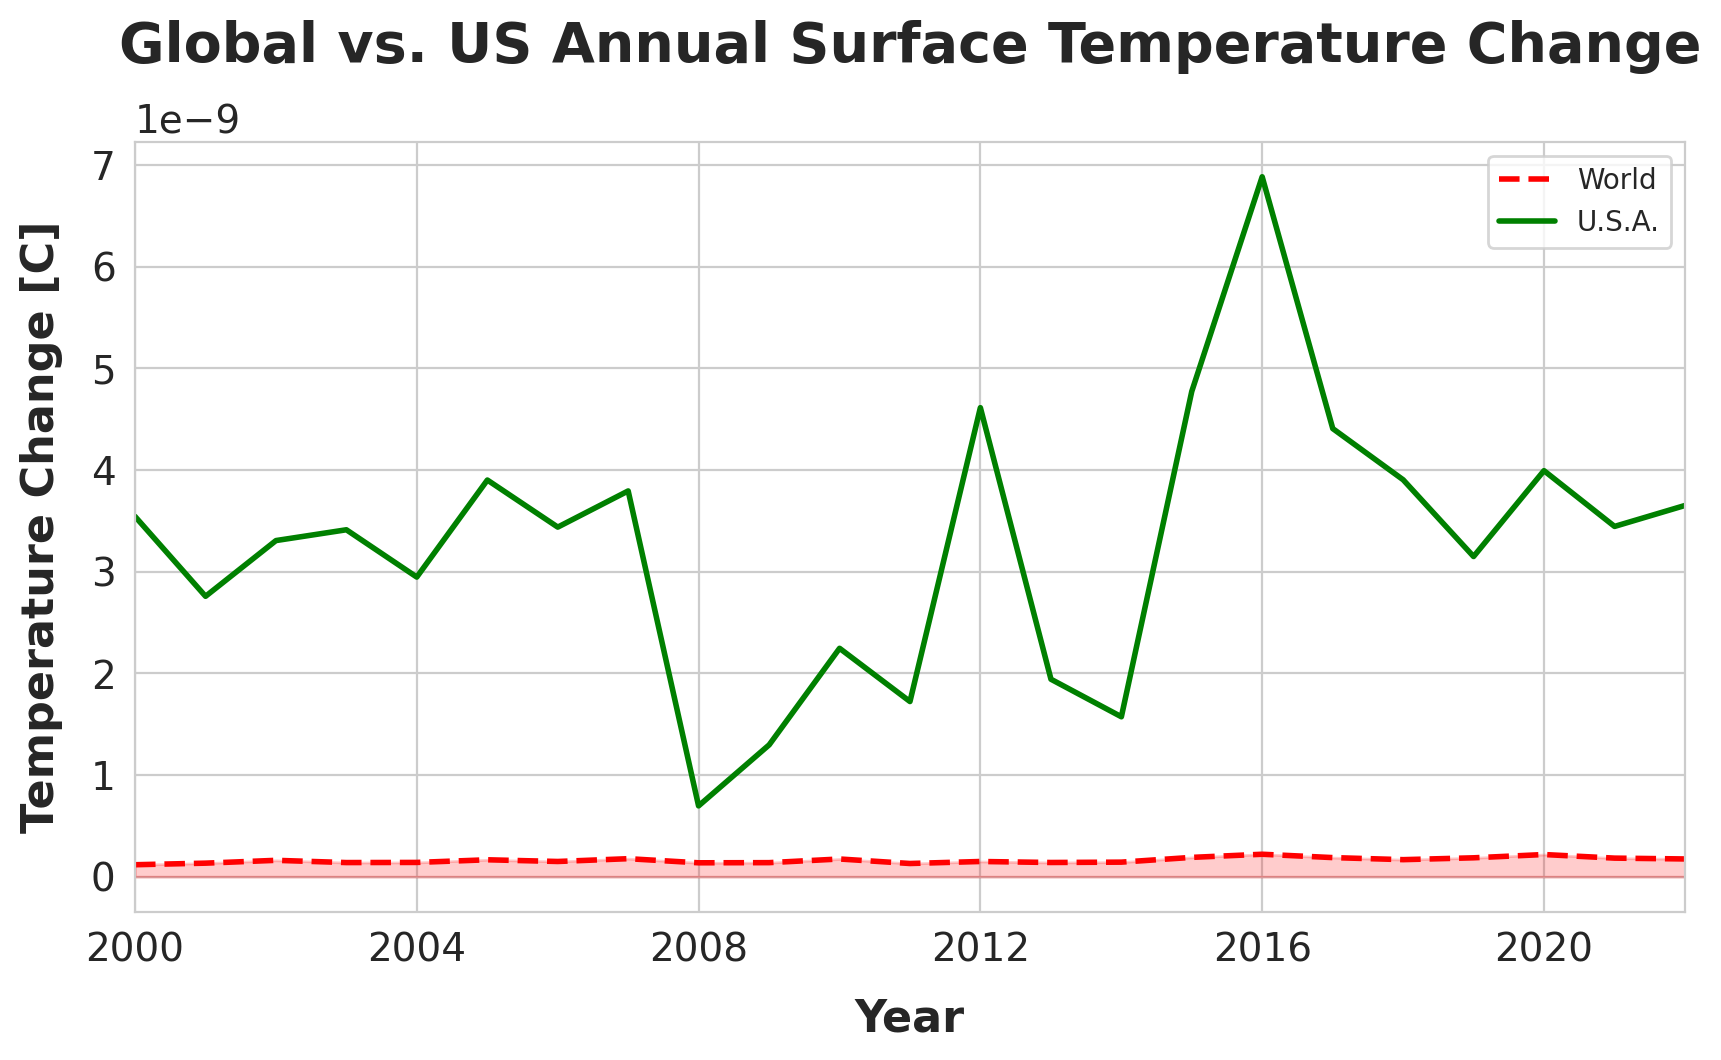

In [224]:
N = 10  # Window size
#astc_pivoted['us_sm'] = astc_pivoted['United States'].rolling(window=N).mean()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# plt.plot(astc_pivoted.index, astc_pivoted['United States'], label='Original Data')

cutoff = pd.Timestamp('2000-01-01')
data = temperature_change_per_capita[temperature_change_per_capita.index >= cutoff]
x = data.index

ax.plot(x, data['World'], label='World', color='red', linestyle='--')
ax.fill_between(x, y1=0, y2=data['World'], color='red', alpha=0.2)
ax.plot(x, data['United States'], label='U.S.A.', color='green')
ax.legend()
ax.set_title('Global vs. US Annual Surface Temperature Change')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change [C]')
ax.set_xlim(cutoff, cutoff+relativedelta(years=22))

# astc_pivoted = astc_pivoted.drop(columns=['us_sm'])

plt.show()

# Atmospheric CO2

In [225]:
atmospheric_co2 = pd.read_csv('./IMF-CID/Quarterly_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv')

In [226]:
atmospheric_co2.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2021Q1,F2021Q2,F2021Q3,F2021Q4,F2022Q1,F2022Q2,F2022Q3,F2022Q4,F2023Q1,F2023Q2
0,1,Advanced Economies,NaN,AETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...",...,42.293087,47.748460,48.483400,48.913728,43.093510,44.589169,50.266832,46.571090,42.771544,45.825663
1,2,Advanced Economies,NaN,AETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...",...,46.520021,48.294118,45.447285,47.177251,47.193073,45.246694,47.181772,44.899062,46.544811,46.207766
2,3,Advanced Economies,NaN,AETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...",...,0.172660,0.173625,0.178046,0.177866,0.178430,0.172420,0.176661,0.179536,0.193959,0.170805
3,4,Advanced Economies,NaN,AETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...",...,0.174595,0.177234,0.177765,0.172601,0.177953,0.177223,0.176762,0.175108,0.190814,0.176155
4,5,Advanced Economies,NaN,AETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...",...,419.933179,299.875618,270.228400,354.486753,412.374069,290.379215,265.027769,362.769846,397.293833,291.778769


In [227]:
countries_to_exclude = []
for cid in atmospheric_co2['ISO3'].dropna().unique().tolist():
    try: 
        wbdata.get_countries(country_id=cid)
    except Exception:
        countries_to_exclude.append(cid)

countries = set(atmospheric_co2['ISO3'].unique())
countries_to_exclude = set(countries_to_exclude)
atmo_countries = countries - countries_to_exclude

In [228]:
atmospheric_co2['Gas_Type'].unique()

array(['Carbon dioxide', 'Fluorinated gases', 'Greenhouse gas', 'Methane',
       'Nitrous oxide'], dtype=object)

In [229]:
filtered_aco2 = atmospheric_co2[atmospheric_co2['Gas_Type']=='Greenhouse gas']
filtered_aco2 = filtered_aco2[filtered_aco2['Seasonal_Adjustment']=='Not Seasonally Adjusted']

In [230]:
filtered_aco2['Country'].unique()

array(['Advanced Economies', 'Africa', 'Americas', 'Asia',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Emerging and Developing Economies', 'Europe',
       'G20', 'G7', 'Latin America and the Caribbean', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania',
       'Other Oceania sub-regions', 'South-eastern Asia', 'Southern Asia',
       'Southern Europe', 'Sub-Saharan Africa', 'Western Asia',
       'Western Europe', 'World'], dtype=object)

In [231]:
atmospheric_co2['Industry'].unique()

array(['Agriculture, Forestry and Fishing', 'Construction',
       'Electricity, Gas, Steam and Air Conditioning Supply',
       'Manufacturing', 'Mining', 'Other Services Industries',
       'Total Households', 'Total Industry and Households',
       'Transportation and Storage',
       'Water supply; sewerage, waste management and remediation activities'],
      dtype=object)

In [232]:
countries_to_consider = ['Africa', 'Northern America', 'Latin America and the Caribbean', 'Asia', 'Europe', 'Australia and New Zealand', 'World']
filtered_aco2_fi = filtered_aco2[filtered_aco2['Industry']=='Total Industry and Households']
filtered_aco2_fi_fc = filtered_aco2_fi[filtered_aco2_fi['Country'].isin(countries_to_consider)]
filtered_aco2_fi_fc['Continent'] =  filtered_aco2_fi_fc['Country']

/tmp/ipykernel_4002/3029640016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aco2_fi_fc['Continent'] =  filtered_aco2_fi_fc['Country']


In [233]:
filtered_aco2_fi_fc_clipped = filtered_aco2_fi_fc[['Continent'] + [c for c in filtered_aco2_fi_fc.columns if 'F2' in c and not '23' in c]]

In [234]:
filtered_aco2_fi_fc_clipped_melted_by_continent = filtered_aco2_fi_fc_clipped.melt(id_vars='Continent', var_name='Financial Quarter', value_name='Value').pivot(index='Financial Quarter', columns='Continent', values='Value')


In [235]:
filtered_aco2_fi_fc_clipped_melted_by_continent.index = pd.PeriodIndex(filtered_aco2_fi_fc_clipped_melted_by_continent.index.str[1:], freq='Q').to_timestamp(how='start')

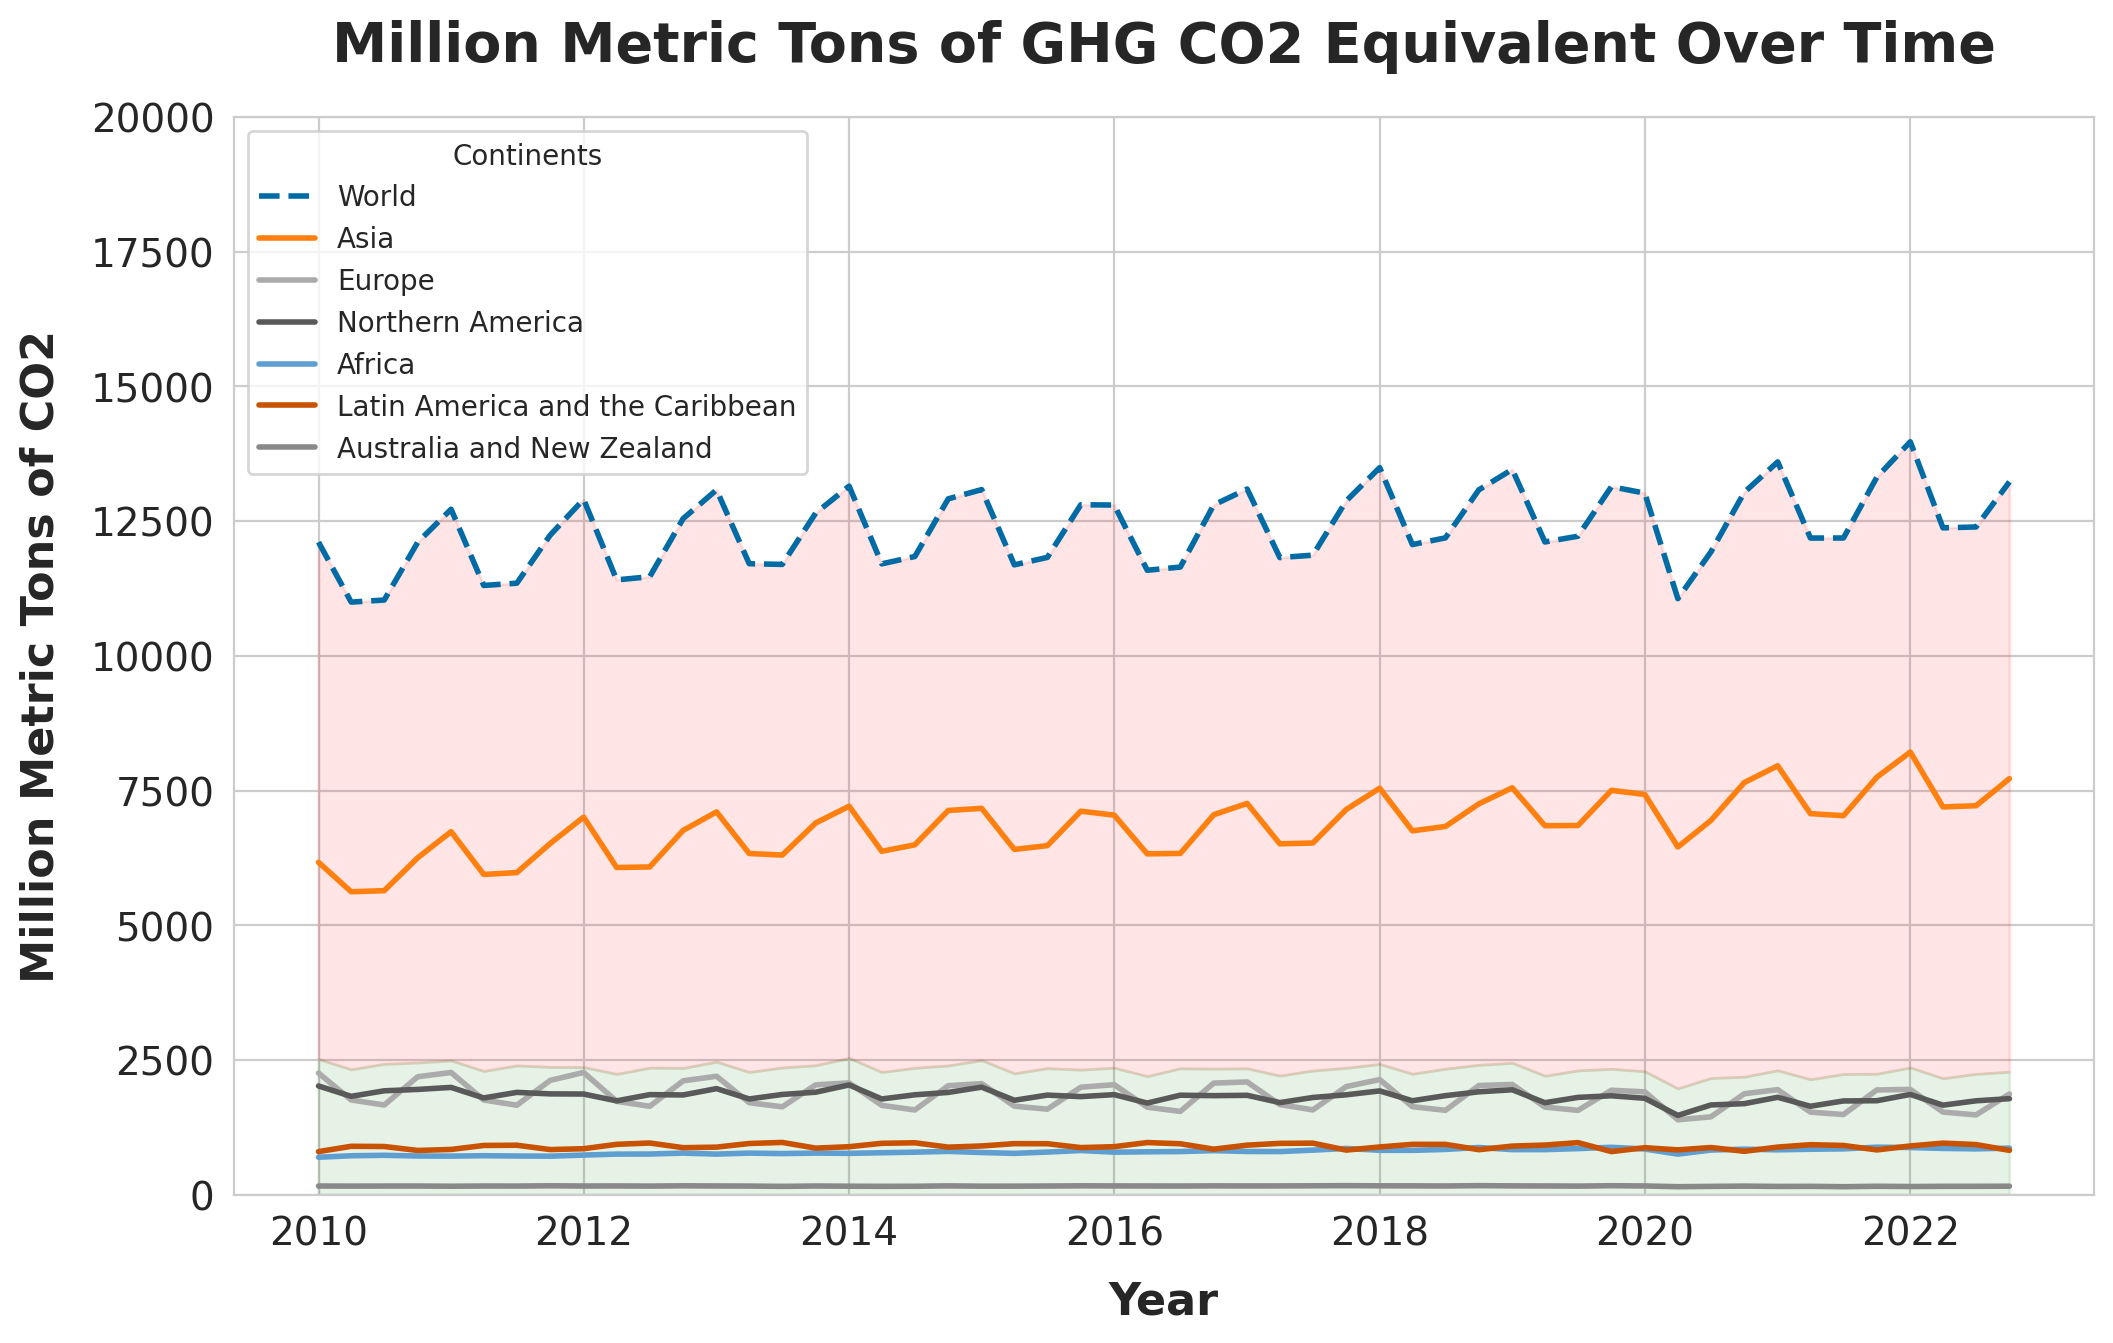

In [262]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Sort DataFrame columns based on the last row's values
sorted_columns = filtered_aco2_fi_fc_clipped_melted_by_continent.iloc[-1].sort_values(ascending=False).index
sorted_df = filtered_aco2_fi_fc_clipped_melted_by_continent[sorted_columns]

# Plot each line
for column in sorted_df:
    ax.plot(sorted_df.index, sorted_df[column], label=column, linestyle='--' if column == 'World' else '-')

ax.fill_between(x=sorted_df.index, y1=sorted_df['Northern America']+500, y2=sorted_df['World'], color='red', alpha=0.1)
ax.fill_between(x=sorted_df.index, y1=0, y2=sorted_df['Northern America']+500, color='green', alpha=0.1)
# Adjust legend
# The legend will automatically order based on the plotting order, which is now sorted
ax.set_title('Million Metric Tons of GHG CO2 Equivalent Over Time')
ax.legend(title='Continents')
ax.set_ylim(0,20000)
ax.set_xlabel('Year')
ax.set_ylabel('Million Metric Tons of CO2')
# fig.tight_layout()
fig.savefig('./ghg_emissions_us_wins.svg')
plt.show()

In [237]:
co2_population_data_df = population_data_df[population_data_df['continent'].isin(countries_to_consider)]

In [238]:
co2_population_data_df_grouped = co2_population_data_df[['date', 'total_population', 'gdp_per_capita', 'continent']].groupby(['continent', 'date']).mean()
co2_population_data_df_grouped = co2_population_data_df_grouped.reset_index()

In [239]:
co2_population_data_df_grouped.head()

,continent,date,total_population,gdp_per_capita
0,Africa,1961-01-01,5.412595e+06,151.809759
1,Africa,1962-01-01,5.544536e+06,151.791334
2,Africa,1963-01-01,5.681303e+06,157.477484
3,Africa,1964-01-01,5.823379e+06,171.101682
4,Africa,1965-01-01,5.970441e+06,185.678523


In [240]:
co2_population_data_df_grouped_pivot = co2_population_data_df_grouped[['continent', 'date', 'total_population']].pivot(index='date', columns='continent', values='total_population')

In [241]:
co2_population_data_df_grouped_pivot.columns = co2_population_data_df_grouped_pivot[filtered_aco2_fi_fc_clipped_melted_by_continent.columns.tolist()].columns

In [242]:
# Clip the population dataframe to fit the years observed by the dataset
co2_pdf_gp_clipped = co2_population_data_df_grouped_pivot[
    (co2_population_data_df_grouped_pivot.index >= filtered_aco2_fi_fc_clipped_melted_by_continent.index.min()) &
    (co2_population_data_df_grouped_pivot.index <= filtered_aco2_fi_fc_clipped_melted_by_continent.index.max())
]

In [243]:
# Ensure, that the two dataframes fit each other, i.e. replicate the yearly data to quarters
co2_pdf_gp_clipped_repeated = co2_pdf_gp_clipped.loc[co2_pdf_gp_clipped.index.repeat(4)]

In [244]:
co2_per_capita = pd.DataFrame(
    filtered_aco2_fi_fc_clipped_melted_by_continent.to_numpy() / co2_pdf_gp_clipped_repeated.to_numpy(),
    columns=filtered_aco2_fi_fc_clipped_melted_by_continent.columns.tolist(), 
    index=filtered_aco2_fi_fc_clipped_melted_by_continent.index
)

In [245]:
# To metric tons
co2_per_capita_in_tons = co2_per_capita*10**6

In [246]:
co2_per_capita_in_tons.iloc[-1].sort_values(ascending=False).index

Index(['Europe', 'Northern America', 'Asia', 'Australia and New Zealand',
       'Africa', 'Latin America and the Caribbean', 'World'],
      dtype='object')

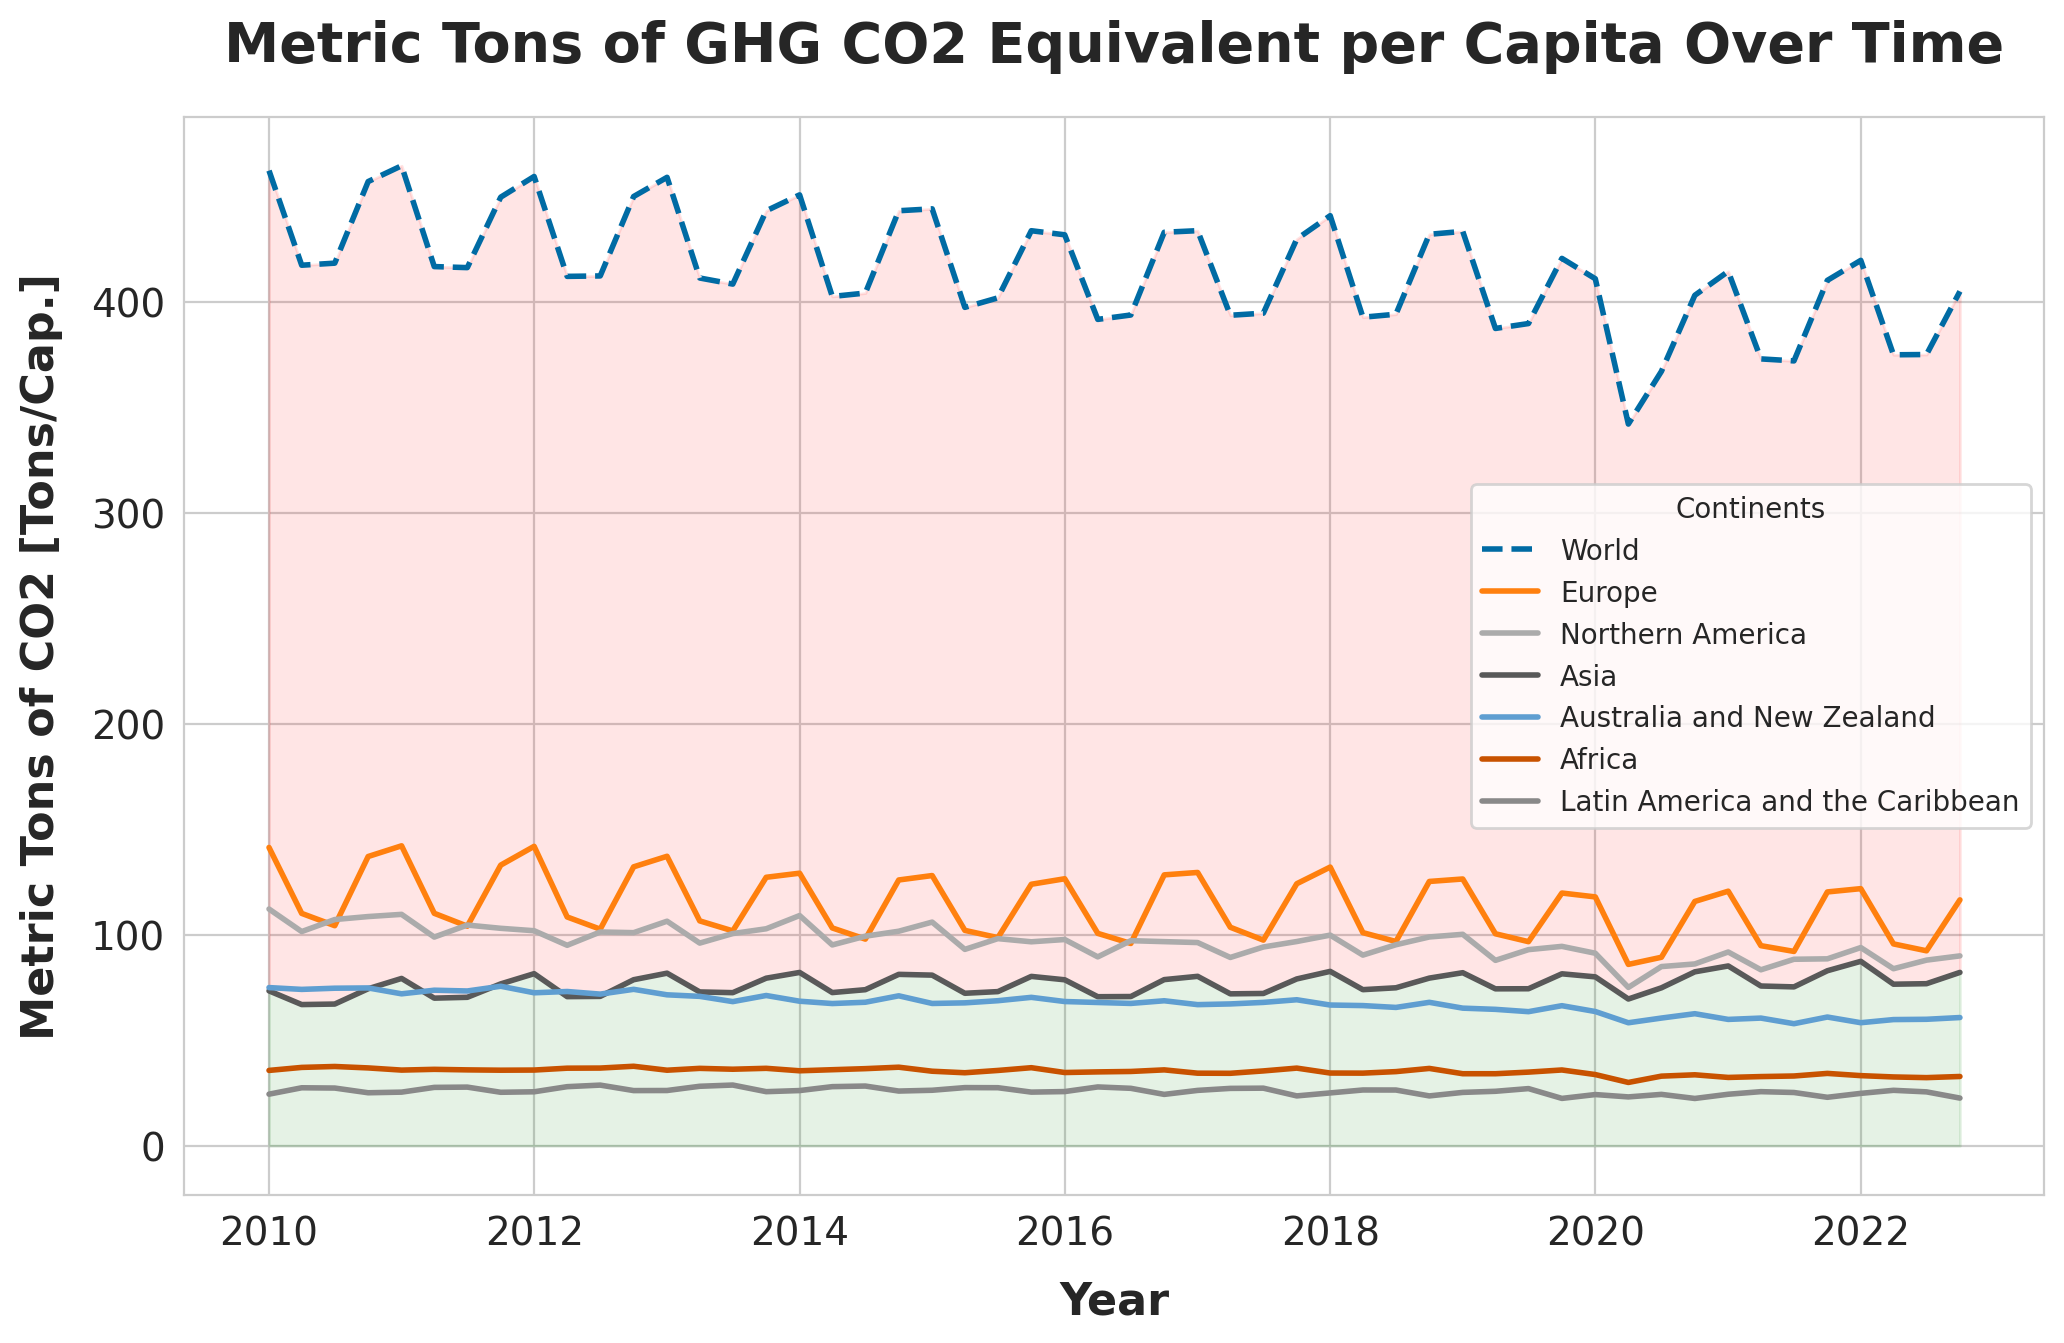

In [263]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Sort DataFrame columns based on the last row's values

sorted_columns = co2_per_capita_in_tons.iloc[-1].sort_values(ascending=False).index
sorted_df = co2_per_capita_in_tons[sorted_columns]
sorted_df['World'] = sorted_df.drop(columns='World').sum(axis=1)
sorted_columns = sorted_df.iloc[-1].sort_values(ascending=False).index
sorted_df = sorted_df[sorted_columns]

# Plot each line
for column in sorted_df:
    ax.plot(sorted_df.index, sorted_df[column], label=column, linestyle='--' if column == 'World' else '-')

# Adjust legend
ax.fill_between(x=sorted_df.index, y1=sorted_df['Asia'], y2=sorted_df['World'], color='red', alpha=0.1)
ax.fill_between(x=sorted_df.index, y1=0, y2=sorted_df['Asia'], color='green', alpha=0.1)
# The legend will automatically order based on the plotting order, which is now sorted
ax.legend(title='Continents')
# ax.set_ylim(0,180)
# ax.set_xlim(sorted_df.index.min(), sorted_df.index.max())
ax.set_title('Metric Tons of GHG CO2 Equivalent per Capita Over Time')
ax.legend(title='Continents')
# ax.set_ylim(0,20000)
ax.set_xlabel('Year')
ax.set_ylabel('Metric Tons of CO2 [Tons/Cap.]')
fig.savefig('./ghg_emissions_us_loses.svg')
plt.show()

# Mitigation

In [82]:
mitigation_taxes = pd.read_csv('IMF-CID/7_Environmental_Taxes.csv')

In [158]:
mitigation_taxes.head()

,Country,ISO2,ISO3,Indicator,Source,CTS Code,CTS Name,CTS Full Descriptor,Unit,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Albania,AL,ALB,Environmental Taxes,Organisation for Economic Co-operation and Dev...,ECGTE,Environmental Taxes,"Environment, Climate Change, Government Policy...",Domestic Currency,NaN,...,NaN,NaN,NaN,4.399314e+10,4.781379e+10,4.754858e+10,5.114559e+10,5.341565e+10,NaN,NaN
1,Albania,AL,ALB,Environmental Taxes,Organisation for Economic Co-operation and Dev...,ECGTE,Environmental Taxes,"Environment, Climate Change, Government Policy...",Percent of GDP,NaN,...,NaN,NaN,NaN,3.067206e+00,3.247163e+00,3.066373e+00,3.124865e+00,3.157133e+00,NaN,NaN
2,Albania,AL,ALB,Taxes on Energy (including fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTEN,Taxes on Energy (Including Fuel for Transport),"Environment, Climate Change, Government Policy...",Domestic Currency,NaN,...,NaN,NaN,NaN,3.774111e+10,4.094562e+10,4.040004e+10,4.352182e+10,4.516530e+10,NaN,NaN
3,Albania,AL,ALB,Taxes on Energy (including fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTEN,Taxes on Energy (Including Fuel for Transport),"Environment, Climate Change, Government Policy...",Percent of GDP,NaN,...,NaN,NaN,NaN,2.631314e+00,2.780726e+00,2.605369e+00,2.659072e+00,2.669496e+00,NaN,NaN
4,Albania,AL,ALB,Taxes on Pollution,Organisation for Economic Co-operation and Dev...,ECGTEP,Taxes on Pollution,"Environment, Climate Change, Government Policy...",Domestic Currency,NaN,...,NaN,NaN,NaN,1.782069e+09,1.879970e+09,1.941324e+09,2.226251e+09,2.625011e+09,NaN,NaN


In [176]:
def is_castable_to_int(var):
    try:
        int(var)  # Try to convert `var` to an integer
        return True  # Conversion successful
    except (ValueError, TypeError):
        return False  # Conversion failed

mitigation_taxes_filtered = mitigation_taxes[(mitigation_taxes['ISO2']=='US') & (mitigation_taxes['Unit']=='Percent of GDP')][['Country', 'CTS Name'] + [c for c in mitigation_taxes.columns if is_castable_to_int(c)]]

<Axes: xlabel='Year'>

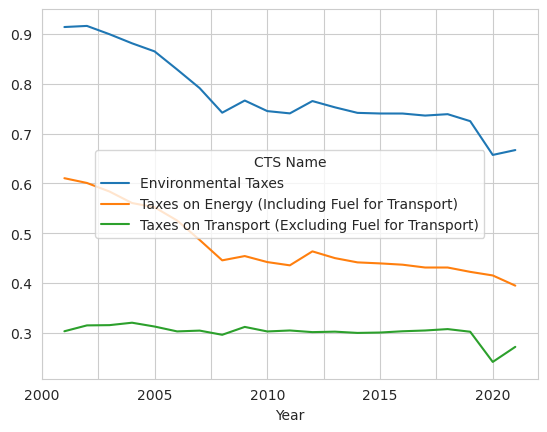

In [177]:
mitigation_taxes_filtered.melt(id_vars=['Country', 'CTS Name'], var_name='Year', value_name='Value').drop(columns='Country').pivot(index='Year', columns='CTS Name', values='Value').plot()

# Trade CO2

In [119]:
trade_co2 = pd.read_csv('./IMF-CID/5_CO2_Emissions_embodied_in_Domestic_Final_Demand_Production_and_Trade.csv')

In [131]:
trade_co2['Indicator'].unique()

array(['CO2 Emissions Embodied in Final Demand, balance',
       'CO2 Emissions Embodied in Final Domestic Demand',
       'CO2 Emissions Embodied in Gross Exports',
       'CO2 Emissions Embodied in Gross Exports, balance',
       'CO2 Emissions Embodied in Gross Imports',
       'CO2 Emissions Embodied in Production'], dtype=object)

<Axes: xlabel='Year'>

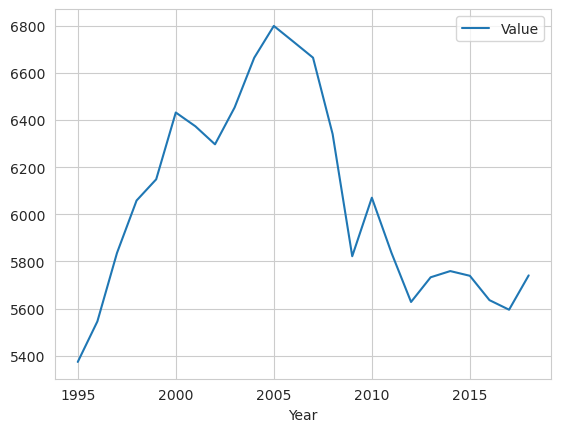

In [133]:
trade_co2[(trade_co2['Country']=='United States') & (trade_co2['Indicator']=='CO2 Emissions Embodied in Final Domestic Demand')][['Country'] + [c for c in trade_co2 if is_castable_to_int(c)]].melt(id_vars=['Country'], var_name='Year', value_name='Value').plot(x='Year', y='Value')

# Global CO2 concentrations

In [141]:
co2_concentrations = pd.read_csv('./IMF-CID/24_Atmospheric_CO2_Concentrations.csv')
co2_concentrations['Date'] = pd.to_datetime(co2_concentrations['Date'], format='%YM%m')

<Axes: xlabel='Date'>

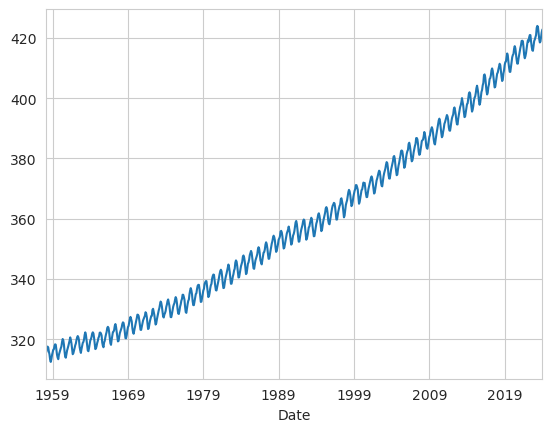

In [145]:
co2_concentrations[co2_concentrations['Unit']=='Parts Per Million'][['Date', 'Value']].plot(y='Value', x='Date', legend=False)

# Global Sea Level Rise

In [151]:
sea_level = pd.read_csv('./IMF-CID/25_Change_in_Mean_Sea_Levels.csv')
sea_level['Date'] = pd.to_datetime(sea_level['Date'], format='D%m/%d/%Y')

<Axes: xlabel='Date'>

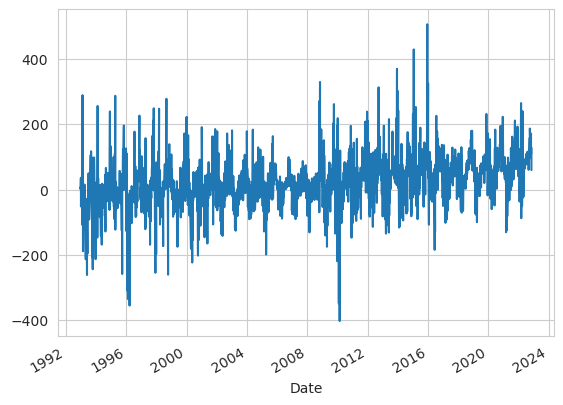

In [234]:
aggregated_sea_level_rise = sea_level.groupby('Date').agg({'Value':'mean'})
aggregated_sea_level_rise[aggregated_sea_level_rise['Date'] > dt.]['Value']

<Axes: xlabel='Date'>

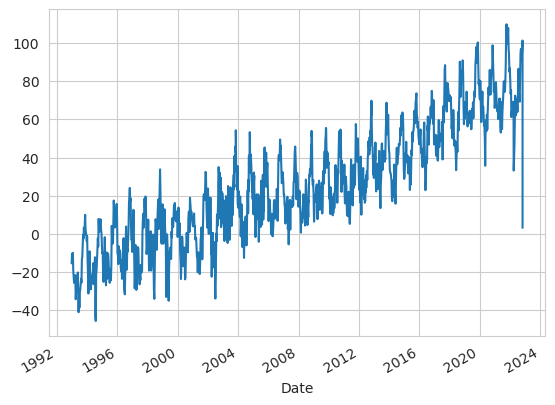

In [156]:
sea_level[sea_level['Measure']=='Atlantic Ocean'][['Country', 'Measure', 'Date', 'Value']].plot(y='Value', x='Date', legend=False)

<Axes: xlabel='Date'>

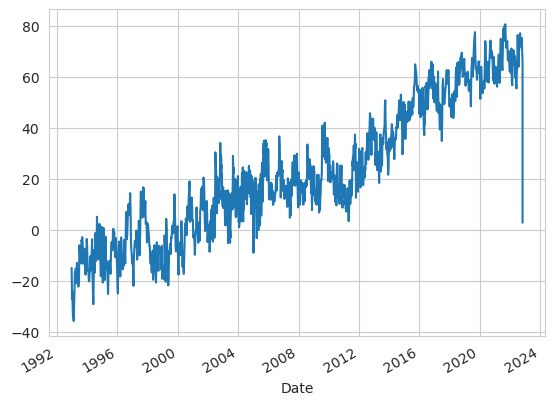

In [157]:
sea_level[sea_level['Measure']=='Pacific Ocean'][['Country', 'Measure', 'Date', 'Value']].plot(y='Value', x='Date', legend=False)